# Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad

In [2]:
ds_salary = np.genfromtxt("entry_level_DS_salary.csv")
ya_income = np.genfromtxt("young_adult_income.csv")

data = [ds_salary, ya_income]

In [3]:
def get_stats(samples):
    n = len(samples)
    mean = np.mean(samples)
    std = np.std(samples)
    return n, mean, std

ds_salary_n, ds_salary_mean, ds_salary_std = get_stats(ds_salary)
ya_income_n, ya_income_mean, ya_income_std = get_stats(ya_income)

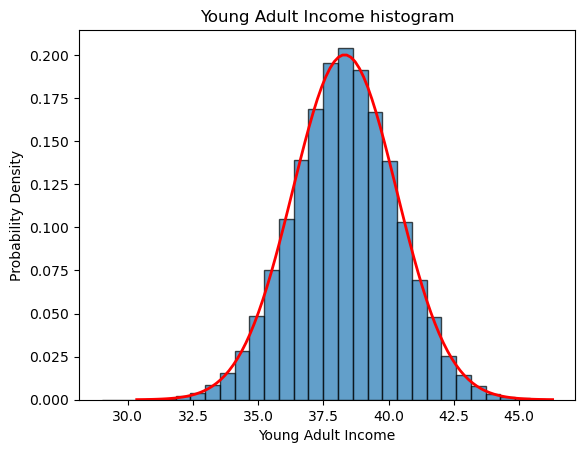

In [4]:
# plotting for young adult income
plt.hist(ya_income, bins=30, density=True, alpha=0.7, edgecolor="black")

x = np.linspace(ya_income_mean - 4*ya_income_std, ya_income_mean + 4*ya_income_std, 100)
y = (1 / (ya_income_std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - ya_income_mean) / ya_income_std) ** 2)
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel("Young Adult Income")
plt.ylabel("Probability Density")
plt.title("Young Adult Income histogram")

plt.show()

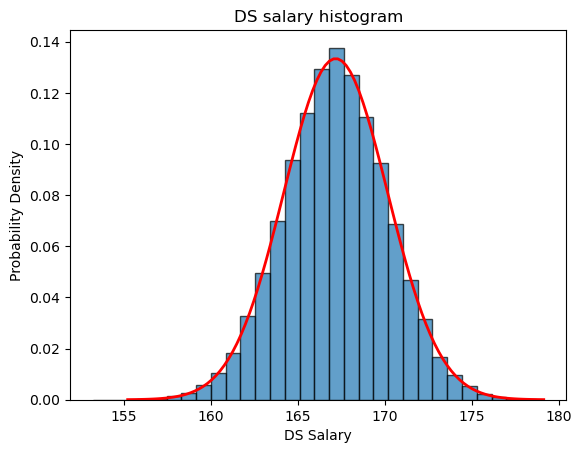

In [5]:
# plotting for DS salary
plt.hist(ds_salary, bins=30, density=True, alpha=0.7, edgecolor="black")

x = np.linspace(ds_salary_mean - 4*ds_salary_std, ds_salary_mean + 4*ds_salary_std, 100)
y = (1 / (ds_salary_std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - ds_salary_mean) / ds_salary_std) ** 2)
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel("DS Salary")
plt.ylabel("Probability Density")
plt.title("DS salary histogram")

plt.show()

# Part 2

In [6]:
# counting method for ya_income
livable_count = len([x for x in ya_income if x > 57.2])
livable_probability = livable_count / ya_income_n
print(f'Probability of making a livable income out of college with counting: {livable_probability}')

Probability of making a livable income out of college with counting: 0.0


# Part 3

In [7]:
# Integration method for ya_income
def integrand_ya_income(x):
    return (1 / (ya_income_std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - ya_income_mean) / ya_income_std) ** 2)

integral_probability, _ = quad(integrand_ya_income, 57.2, 100)
print(f'Probability of making a livable income out of college with integration: {np.round(integral_probability, 4)}')

Probability of making a livable income out of college with integration: 0.0


# Part 4

In [8]:
# Integration method for ds_salary
def integrand_ds_salary(x):
    return (1 / (ds_salary_std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - ds_salary_mean) / ds_salary_std) ** 2)

integral_probability, _ = quad(integrand_ds_salary, 57.2, 1000) # using 1000 as upper bounds, since its basically the same as infinity
print(f'Probability of making a livable income out of college with integration: {integral_probability}')

Probability of making a livable income out of college with integration: 0.9999999999999992


# Part 5

In [9]:
# Getting probability of top 10% via counting
top_10_count = len([x for x in ds_salary if x > 167])
top_10_probability = top_10_count / ds_salary_n
print(f'Probability of being a top 10% earner with counting: {top_10_probability}')

# Getting probability with integration
integral_probability, _ = quad(integrand_ds_salary, 167, 1000) # using 1000 as upper bounds, since its basically the same as infinity
print(f'Probability of being a top 10% earner with integration: {top_10_probability}')

Probability of being a top 10% earner with counting: 0.5223
Probability of being a top 10% earner with integration: 0.5223


# Part 6

Given these stats, this will influence the probability that I will work harder in Prof. Wu's class to become a successful DS engineer